In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_main = pd.read_csv('/content/drive/MyDrive/df_main.csv')

In [ ]:
X = df_main.drop('label',axis=1)
y = df_main['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label,Cluster
0,0,134116,4,51524,206428,23,2.999051,0,0,5,0,5,3,180,0,0,0,4,0
1,1,59689,4,60905,33006,23,2.998796,0,0,5,0,5,3,180,0,0,0,4,1
2,2,67942,4,52259,122570,23,2.999300,0,0,5,0,5,3,180,0,0,0,4,2
3,3,119573,4,42207,1205,8080,2.993548,0,0,5,0,5,3,180,0,0,0,4,1
4,4,257452,4,40459,150680,23,2.998807,0,0,5,0,5,3,180,0,0,0,4,2


In [ ]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'missed_bytes',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'label', 'detailed-label', 'Cluster'],
      dtype='object')

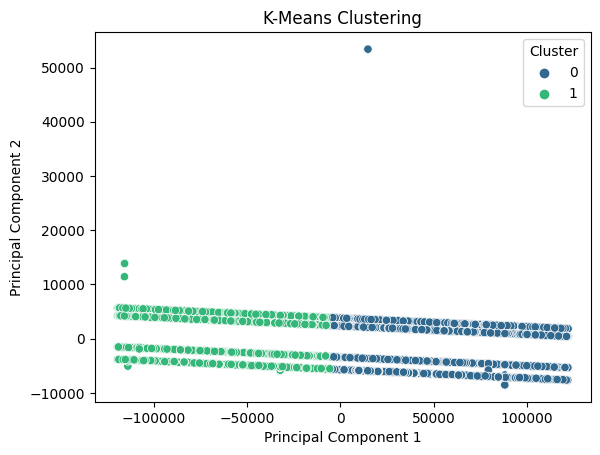

In [ ]:
k = 2

# Define the columns you want to use for clustering
selected_columns = ['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'duration','orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes','label']

# Extract the selected columns from the DataFrame
data = df[selected_columns]

# Create a KMeans instance
kmeans = KMeans(n_clusters=k, n_init=20)

# Fit the model to your data
kmeans.fit(data)

# Add the cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

# Reduce data to 3 principal components for visualization
pca = PCA(n_components=3)
data_2d = pca.fit_transform(data)

# Create a scatter plot with cluster coloring
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering")
plt.show()

In [ ]:
pca = PCA(n_components=3)  # Specify the number of principal components you want
X_pca = pca.fit_transform(data)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Choose the value of 'k' for KNN
k = 5  # You can adjust this value

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9990964892152363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69390
           1       0.84      1.00      0.91       338

    accuracy                           1.00     69728
   macro avg       0.92      1.00      0.96     69728
weighted avg       1.00      1.00      1.00     69728

